## Домашнее задание №2

<span style="color: red; font-size: 14pt">Дедлайн: 13 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

Составлено с использованием материалов Евгения Колмакова и Юрия Кашницкого (открытый курс машинного обучения, тема 3), а также лекций по машинному обучению Евгения Соколова

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 0. Вопросы для самоконтроля

##### Перед выполнением задания убедитесь, что вы знаете ответы на этот теор.минимум
##### Эта часть задания не оценивается, ответы можно не записывать

1. Что такое решающее дерево? Как по построенному дереву найти прогноз для объекта?
2. Почему для любой выборки можно построить дерево, имеющее нулевую ошибку на ней? Приведите примеры.
3. Почему не рекомендуется строить небинарные деревья (имеющие более двух потомков у каждой вершины)?
4. Как устроен жадный алгоритм построения дерева?
5. Какие критерии информативности для решения задачи классификации вы знаете?
6. Какой смысл у критерия Джини и энтропийного критерия?
7. Какие критерии информативности для решения задачи регрессии вы знаете?
8. Что такое pruning (стрижка) дерева? Чем отличаются post-pruning и pre-pruning?
9. Какие методы обработки пропущенных значений вы знаете?
10. Как учитывать категориальные признаки в решающем дереве?
11. Что такое mean target encoding? Почему эта техника хорошо работает для решающих деревьев?
12. Как работает отбор признаков с помощью решающих деревьев?

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 1 час

##### Решение можно затехать здесь или написать от руки и добавить фото в ноутбук

### Задача 1 (10% баллов)

Какая стратегия поведения в листьях регрессионного дерева приводит к меньшему матожиданию ошибки по MSE: отвечать средним значением таргета на объектах обучающей выборки, попавших в лист, или отвечать таргетом для случайного объекта из листа (считая все объекты равновероятными)?

В первом случае оценка: $y^{*} = \frac{1}{n} \sum_{i=1}^{n}y_i$

Во втором случае оценка: $y^{*} = \xi$ где $\xi$ распределена равномерно

Заметим, что матожидание обеих оценок одинаково: $Ey^{*} = \frac{1}{n} \sum_{i=1}^{n}y_i$.

$E\sum_{i=1}^{n}(y_i - y^*)^2 = \sum_{i=1}^{n}{y_i^2} - 2\cdot \sum_{i=1}^{n}{y_i \cdot Ey^*} + \sum_{i=1}^{n}{Ey^*}^2$

Первое и второе слагаемые совпадают.

Третье слагаемое в первом случае будет равно $(\frac{1}{n} \sum_{i=1}^{n}y_i)^2$, а во втором случае -- $E\xi^2 \geq (E\xi)^2 = (\frac{1}{n} \sum_{i=1}^{n}y_i)^2$. 

Следовательно, $MSE$ в первом случае будет меньше.

### Задача 2 (15% баллов)

Критерий информативности для набора объектов $L$ вычисляется на основе того, насколько хорошо их целевые переменные предсказываются константой (при оптимальном выборе этой константы):
$$H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y_i, c),$$
где $L(y_i, c)$- некоторая функция потерь. Соответственно, чтобы получить вид критерия при конкретной функции потерь, необходимо аналитически найти оптимальное значение константы и подставить его в формулу для $H(R)$.

Выведите критерии информативности для следующих функций потерь:
1. $L(y,c) = (y-c)^2$
2. $L(y,c) = \sum_{k=1}^K (c_k-[y=k])^2$
3. $L(y,c) = -\sum_{k=1}^K [y=k]\log c_k$

**Подсказка**:
должны получиться дисперия, критерий Джини и энтропийный критерий.

Требуется минимизировать $\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y, c)$

$1.$ Продифференцируем по $c$ и приравняем к $0$
$\sum_{(x_i,y_i) \in R} (y_i - c) = 0$

$c = \frac{1}{|R|} \sum_{(x_i, y_i) \in R}y_i = \frac{\overline{y}}{|R|}$

Подставим и получим дисперсию:
$H(R) = \frac{1}{|R|}\sum_{i=1}^R(y - \overline{y})^2$

$2.$ Аналогично

$\frac{2}{|R|}\sum_{i=1}^R\sum_{k=1}^K(c_k - [y_i = k]) = 0 $

$k$ не меняется, так как частная производная по $c$:

$\frac{1}{|R|}\sum_{i=1}^R(c_k - [y_i = k]) = 0$

$\frac{\sum_{i=1}^R[y_i = k]}{|R|}= p_k$ -  доля объектов в выборке

$c_k = p_k$

Подставим и получим критерий Джинни:
$H(R) = \frac{1}{|R|}\sum_{i=1}^R\sum_{k=1}^K(p_k - [y_i = k])^2 = \sum_{k=1}^Kp_k^2 - 2\sum_{k=1}^Kp_k^2 + \sum_{k=1}^Kp_k = \sum_{k=1}^Kp_k(1 - p_k)$ 

### Задача 3 (5% баллов)

Запишите оценку сложности построения одного решающего дерева в зависимости от размера обучающей выборки $l$, числа признаков $d$, максимальной глубины дерева $D$. В качестве предикатов используются пороговые функции $[x_j>t]$. При выборе предиката в каждой вершине перебираются все признаки, а в качестве порогов рассматриваются величины $t$, равные значения этого признака на объектах, попавших в текущую вершину. Считайте сложность вычисления критерия информативноси константной.

Пусть в вершину попало $n$ элементов. Индекс $j$ можно выбрать $d$ способами, выбрать порог $t$ -- $n$ способами. Сложность выбора предиката -- $O(dn)$. На каждом уровне дерева находится $l$ элементов.

По условию, глубина -- $D$ , поэтому сложность построения дерева $O(Ddl)$ .

## Часть 2. Визуализация решающих деревьев

##### 20% баллов за задание, оценочное время выполнения 30 минут

Для начала нужно поставить GraphViz

- На macOS:
    - sudo pip install pydotplus
    - brew install graphviz
- Linux должно работать то же самое с заменой brew на sudo apt-get
    - sudo pip install pydotplus
    - sudo apt-get install graphviz
- Windows
    - Установить GraphViz отсюда: http://www.graphviz.org/Download_windows.php
    - Добавить путь к папке bin в PATH (например, "C:\Programs\Graphviz2.38\bin")
    - pip install pydotplus

Постройте решающее дерево из sklearn на датасете Car Evaluation Dataset (https://archive.ics.uci.edu/ml/datasets/car+evaluation)

In [45]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn import preprocessing

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
columns = ('buying maint doors persons lug_boot safety class')
data.columns = columns.split()

In [46]:
data.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

Перекодируем категориальные признаки

In [53]:
def number_encode_features(data):
    result = data.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_data, encoders = number_encode_features(data)
encoded_data.head()

buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2

In [48]:
model = tree.DecisionTreeClassifier()
model.fit(encoded_data.iloc[:, :-1], encoded_data['class'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Визуализируйте получившееся дерево с помощью GraphViz (следующая функция может помочь):

In [70]:
import IPython.display #needed to render in notebook
from io import StringIO
import pydotplus  #needed to convert dot format to png
from sklearn import tree

def draw_decision_tree(clf, column_names):
    dot_data = StringIO() 
    tree.export_graphviz(clf, out_file=dot_data, feature_names=column_names, filled=True, rounded=True,  
                         special_characters=True) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    a = IPython.display.Image(graph.create_png())
    IPython.display.display(a)
#     return IPython.display.Image(graph.create_png())

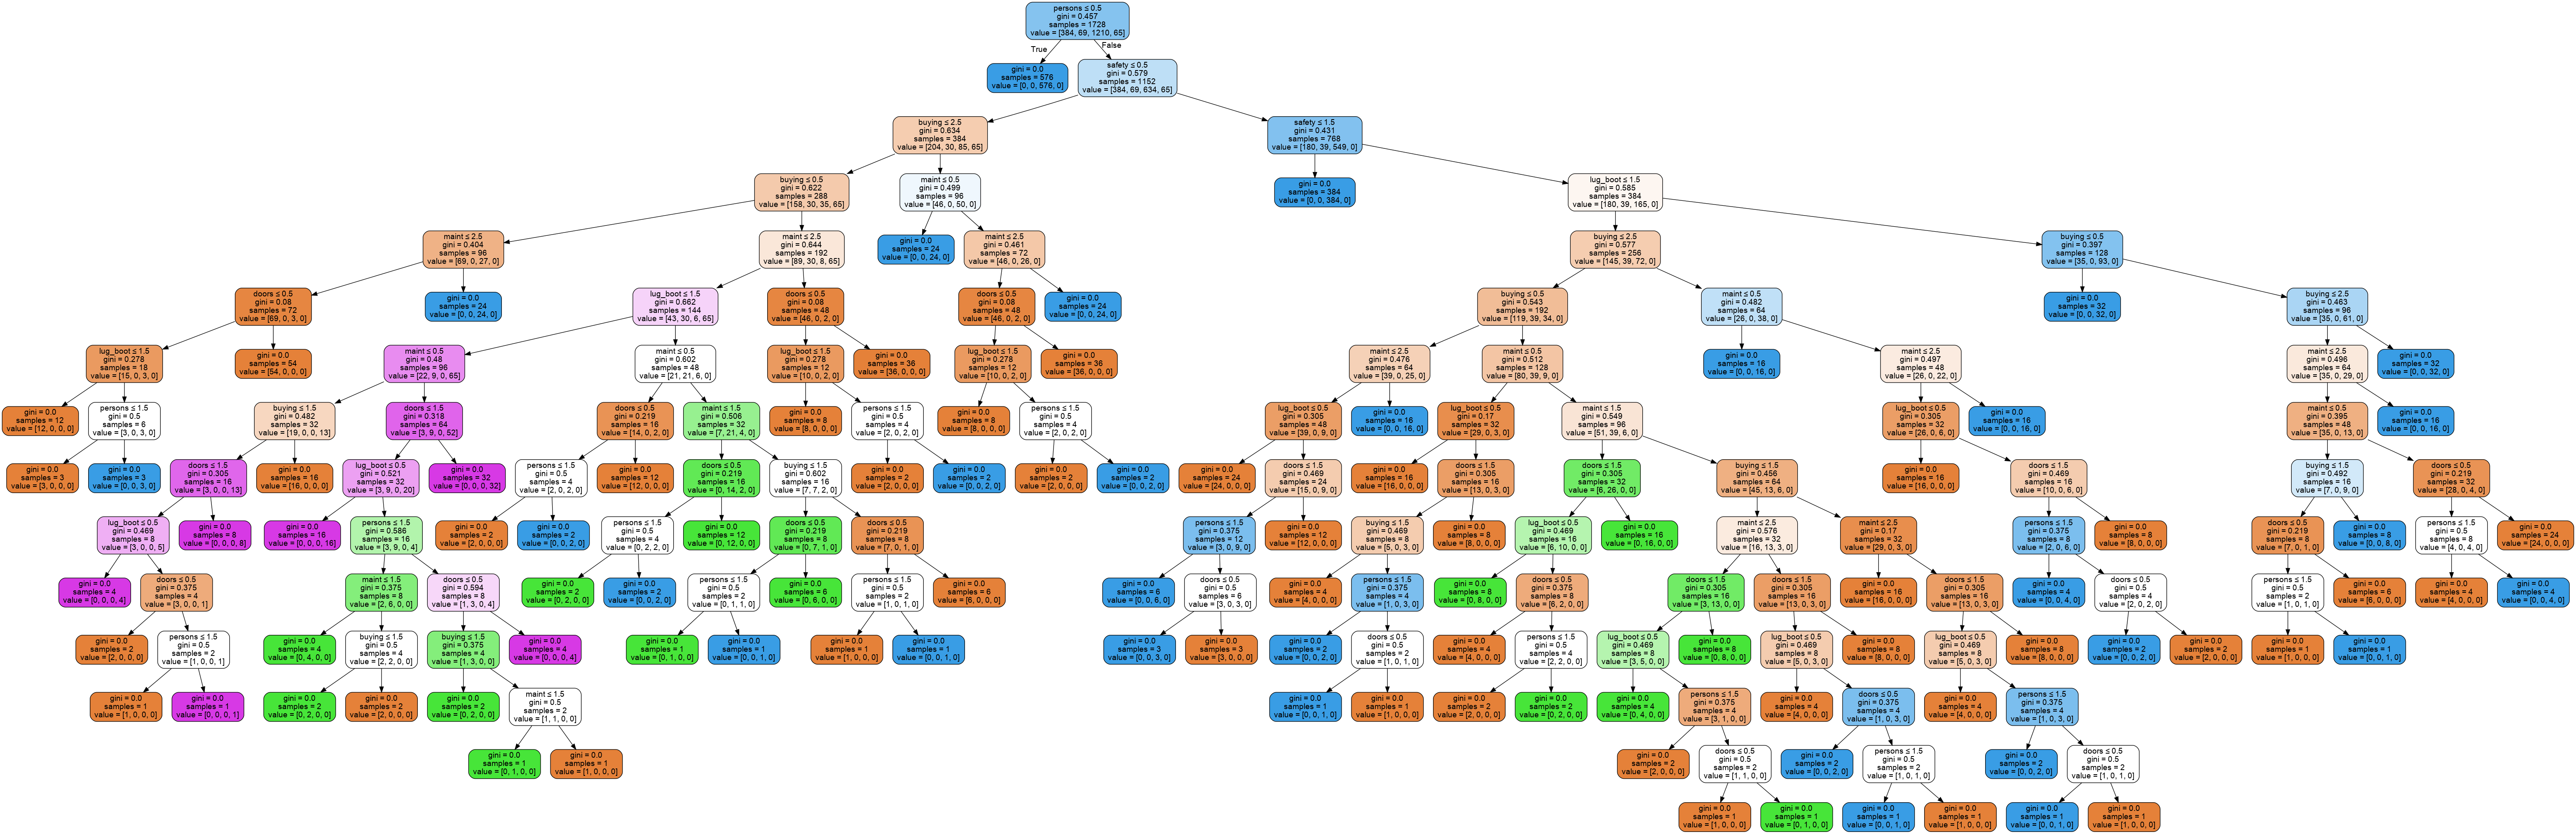

In [71]:
draw_decision_tree(model, data.columns[:-1])

Посмотрите, как меняется картинка для различных значений структурных параметров (варьируйте параметры max_depth, criterion, min_samples_leaf, max_features). Убедитесь, что увеличение глубины дерева и уменьшение количества объектов в листьях способствует гибкости модели и, как следствие, переобучению (что соответствует интуитивным соображениям о структуре дерева).

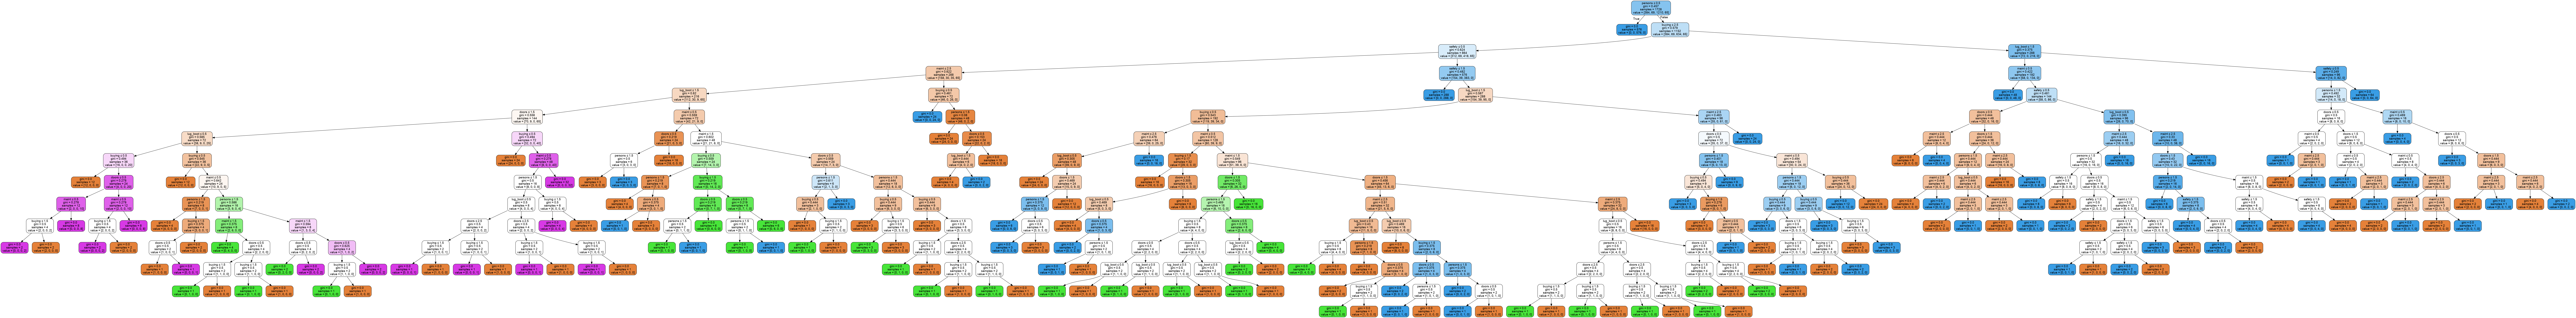

In [87]:
model = tree.DecisionTreeClassifier(max_depth=None, max_features=3)
model.fit(encoded_data.iloc[:, :-1], encoded_data['class'])
draw_decision_tree(model, data.columns[:-1])

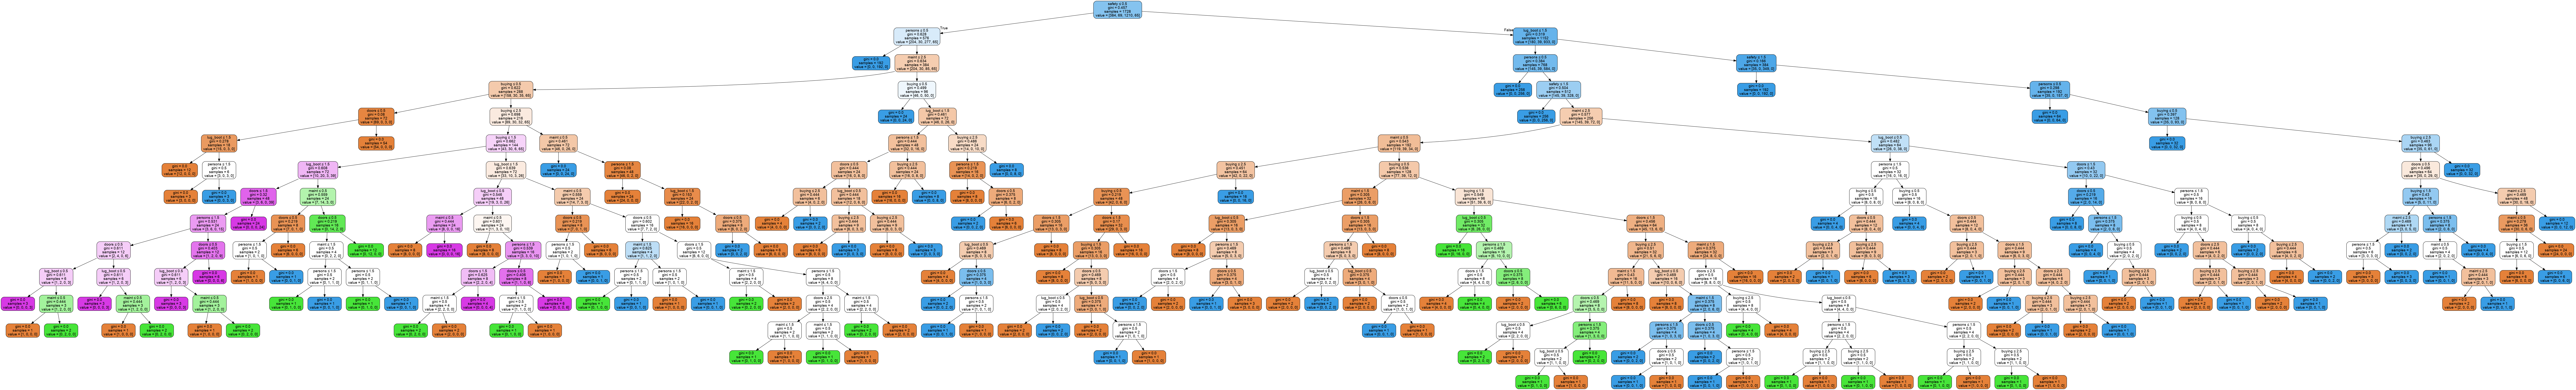

In [92]:
model = tree.DecisionTreeClassifier(max_depth=100, max_features=3)
model.fit(encoded_data.iloc[:, :-1], encoded_data['class'])
draw_decision_tree(model, data.columns[:-1])

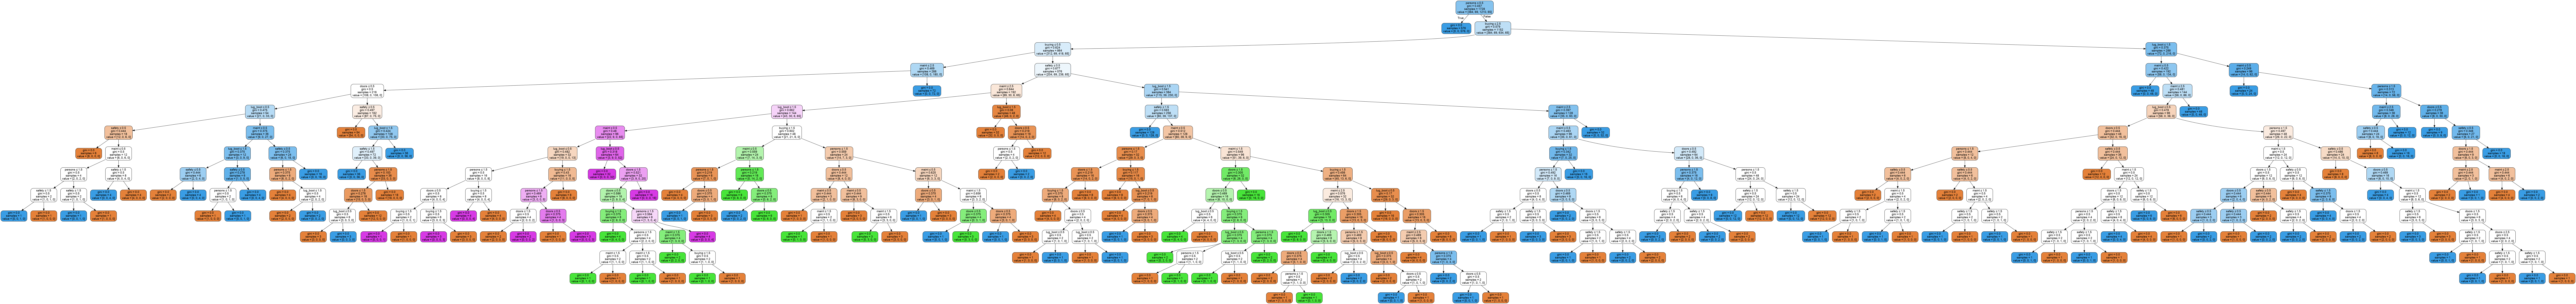

In [93]:
model = tree.DecisionTreeClassifier(max_depth=50, max_features=3)
model.fit(encoded_data.iloc[:, :-1], encoded_data['class'])
draw_decision_tree(model, data.columns[:-1])

## Часть 3. Реализация алгоритма построения дерева решений

##### 50% баллов за задание, оценочное время выполнения 2-3 часа

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification, make_regression, load_digits, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import median

Зафиксируем заранее `random_state` (a.k.a. random seed). Это должно повысить вероятность полной воспроизводимости результатов, впрочем, замечено, что тем не менее небольшие флуктуации возможны (например, качества прогнозов дерева, которое мы сейчас вырастим) в случае разных ОС.

In [5]:
RANDOM_STATE = 42

**Необходимо реализовать класс `DecisionTree`**

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    `min_samples_split` - минимальное число объектов в вершине, при котором происходит её разбиение (по умолчанию - 2); 
    `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', для регрессии - 'variance' или 'mad_median'; 
    по умолчанию - 'gini');
    
    Функционал, значение которого максимизируется для поиска оптимального разбиения в данной вершине имеет вид
    $$Q(X, j, t) = F(X) - \dfrac{|X_l|}{|X|} F(X_l) - \dfrac{|X_r|}{|X|} F(X_r),$$
    где $X$ - выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ - разбиение выборки $X$ на две части 
    по предикату $[x_j < t]$, а $F(X)$ -критерий разбиения.
    
    1. Для классификации: пусть $p_i$ - доля объектов $i$-го класса в выборке $X$.
    
        - 'gini': Неопределенность Джини $F(X) = 1 -\sum_{i = 1}^K p_i^2$.
    
        - 'entropy': Энтропия $F(X) = -\sum_{i = 1}^K p_i \log_2(p_i)$.
    
    2. Для регрессии: $y_j = y(x_j)$ - ответ на объекте $x_j$, $y = (y_1, \dots, y_{|X|})$ - вектор ответов.
    
        - 'variance': Дисперсия (среднее квадратичное отклонение от среднего) $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j - \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2$
    
        - 'mad_median': Среднее отклонение от медианы $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}|y_j - \mathrm{med}(y)|$
    
- класс имеет методы `fit`, `predict` и `predict_proba`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `DecisionTree`, представляющий собой решающее дерево, обученное по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict_proba` принимает матрицу объектов `X` и возвращает матрицу `P` размера `X.shape[0] x K`, где `K` - число классов, такую что $p_{ij}$ есть вероятность принадлежности объекта, заданного $i$-ой строкой матрицы X к классу $j \in \{1, \dots, K\}$.
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов; в случае классификации - это 
    наиболее многочисленный класс в листе, в который попал объект, а в случае регрессии - среднее значение ответов по 
    всем объектам этого листа;

**Советы по реализации:**

- Обучение дерева можно реализовать простым жадным рекурсивным алгоритмом: каждый раз выбирать наилучшее разбиение (номер признака и порог по нему).
- Если возможных порогов для разбиения будет слишком много, выбор наилучшего разбиения окажется вычислительно очень громоздкой задачей. Можно ограничить множество порогов любым удобным способом (например, посчитать квантили значений каждого признака или просто взяв случайный набор порогов).
- Лучше не подсматривать решение в готовых нагугленных вариантах. От вас требуется сделать всего лишь максимально простую реализацию того, как строится и применяется решающее дерево, а не применимую на практике универсальную библиотеку.

### Реализация (30% баллов)

In [29]:
class Node:
    def __init__(self, indices):
        self.indices = indices
        self.left = None
        self.right = None
        self.bound = None
        self.cat = None
        self.res = None
        self.prob_res = None
        
    def walk(self, x, y, regr):
        if x[self.cat] < self.bound:
            if self.left != None and self.left.bound != None:
                return self.left.walk(x, y, regr)
        else:
            if self.right != None and self.right.bound != None:
                return self.right.walk(x, y, regr)
        
        if self.res is None:
            unique, counts = np.unique(y[self.indices], return_counts=True)
            if not regr:
                self.res = unique[np.argmax(counts)]
            else:
                self.res = round(y[self.indices].mean())
        return self.res
    
    def walk_prob(self, x, y, regr):
        if x[self.cat] < self.bound:
            if self.left != None and self.left.bound != None:
                return self.left.walk_prob(x, y, regr)
        else:
            if self.right != None and self.right.bound != None:
                return self.right.walk_prob(x, y, regr)
            
        if self.prob_res is None:
            if not regr:
                unique, counts = np.unique(y[self.indices], return_counts=True)
            else:
                unique, counts = np.unique(round(y[self.indices]), return_counts=True)
            res = np.zeros(len(np.unique(y, return_counts=False)))
            for i in range(len(unique)):
                res[unique[i]] = counts[i]/len(self.indices)
            self.prob_res = res
            
        return self.prob_res        

In [30]:
def entropy(y):
    unique, counts = np.unique(y, return_counts=True)
    p = counts/len(y)
    return -np.sum(np.dot(p, np.log2(p)))

def gini(y):
    unique, counts = np.unique(y, return_counts=True)
    return 1.0 - np.sum((counts/len(y))**2)

def variance(y):
    if len(y) == 0:
        return 0
    return sum((y - sum(y)/len(y))**2)/len(y)

def mad_median(y):
    if len(y) == 0:
        return 0
    return np.sum(np.abs(y - np.median(y)))/len(y)

class DecisionTree(BaseEstimator):
    
    def __init__(self, max_depth=np.inf, min_samples_split=2, 
                 criterion='gini', debug=False):
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.debug = debug
        
        self.X = None
        self.y = None
        self.boundary_candidates = None
        self.boundary_numb = 5
        self.root = None
        self.eps = 1e-7
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        self.F = None
        
        if self.criterion == 'gini':
            self.F = lambda x: gini(x)
            self.regr = False
        elif self.criterion == 'entropy':
            self.F = lambda x: entropy(x)
            self.regr = False
        elif self.criterion == 'variance':
            self.F = lambda x: variance(x)
            self.regr = True
        elif self.criterion == 'mad_median':
            self.F = lambda x: mad_median(x)
            self.regr = True
        
        if self._boundary_candidates():
            self.root = Node([x for x in range(len(y))])
            self._build_tree(self.root, 0)
                    
        
    def predict(self, X):
        y = []
        for x in X:
            y.append(self.root.walk(x, self.y, self.regr))
        return y
        
    def predict_proba(self, X):
        matrix = np.zeros((X.shape[0], len(self.y)))
        for i in range(X.shape[0]):
            tmp = self.root.walk_prob(X[i, :], self.y, self.regr)
            for j in range(len(tmp)):
                matrix[i][j] = tmp[j] 
        return matrix
    
    def _build_tree(self, node, depth):
        if depth > self.max_depth or len(node.indices) <= self.min_samples_split:
            return
        
        left, right, bound, cat = self._get_matrix_max(node)
        node.bound = bound
        node.cat = cat
        if left == node.indices or right == node.indices:
            return
        node.left = Node(left)
        node.right = Node(right)
        
        self._build_tree(node.left, depth + 1)
        self._build_tree(node.right, depth + 1)
        
    
    def _boundary_candidates(self):
        if self.X is None or self.y is None:
            return False
        self.boundary_candidates = list()
        for column in range(self.X.shape[1]):
            self.boundary_candidates.append(np.linspace(np.min(self.X[:, column]),
                                           np.max(self.X[:, column]), num=self.boundary_numb))
        return True
    
    def _get_matrix_max(self, node):
        left, right = [], []
        best = -1.0
        bound_res = float()
        cat = int()
        for category_num in range(self.X.shape[1]):
            for bound in self.boundary_candidates[category_num]:
                y_left, y_right = self._divide(category_num, node, bound)
                tmp = self._count_predicate(node.indices, y_left, y_right)
                if tmp - best > self.eps:
                    best = tmp
                    left = y_left
                    right = y_right
                    bound_res = bound 
                    cat = category_num
        return left, right, bound_res, cat
    
    def _divide(self, cat_num, node, bound):
        y_left = list(filter(
            lambda i:  bound - self.X[i][cat_num] > self.eps,
            node.indices))
        y_right = list(filter(
            lambda i: bound - self.X[i][cat_num] <= self.eps,
            node.indices))
        return y_left, y_right
    
    def _count_predicate(self, y_in, y_left, y_right):
        return self.F(self.y[y_in]) - (len(y_left)/len(y_in))*self.F(self.y[y_left]) - (len(y_right)/len(y_in))*self.F(self.y[y_right])

## Тестирование реализованного алгоритма

### Классификация (10% баллов)

С помощью метода `load_digits` загрузите датасет `digits`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие решающие деревья и убедитесь, что критерии gini и entropy дают разные результаты.

In [31]:
from sklearn.metrics import accuracy_score, make_scorer
import numpy as np

In [32]:
digits = load_digits()
X_train, X_test, Y_train, Y_test = train_test_split(digits['data'], digits['target'], test_size=0.2, random_state = 42)

In [33]:
model = DecisionTree(max_depth=5)
model.fit(X_train, Y_train)

In [34]:
prediction = model.predict(X_test)
accuracy_score(Y_test, prediction)

0.6861111111111111

In [35]:
model = DecisionTree(max_depth=5, criterion='entropy')
model.fit(X_train, Y_train)

In [36]:
prediction = model.predict(X_test)
accuracy_score(Y_test, prediction)

0.7805555555555556

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - range(3, 11), а для criterion - {'gini', 'entropy'}. Критерий качества `scoring`='accuracy'.

In [37]:
grid = {}
grid['max_depth'] = np.array([x for x in range(3, 11)])
grid['criterion'] = np.array(['gini', 'entropy'])

In [38]:
gs = GridSearchCV(DecisionTree(), grid, cv=5, scoring='accuracy', verbose=2)
gs.fit(digits['data'], digits['target'])
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   5.8s
[CV] criterion=gini, max_depth=3 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV] ...................... criterion=gini, max_depth=3, total=   8.5s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   8.3s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   9.8s
[CV] criterion=gini, max_depth=3 .....................................
[CV] ...................... criterion=gini, max_depth=3, total=   7.4s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=  10.2s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=  10.5s
[CV] criterion=gini, max_depth=4 .....................................
[CV] ...................... criterion=gini, max_depth=4, total=  10.2s
[CV] criterion=gini, max_depth=4 .....................................
[CV] .

[CV] ................... criterion=entropy, max_depth=6, total=  15.8s
[CV] criterion=entropy, max_depth=7 ..................................
[CV] ................... criterion=entropy, max_depth=7, total=  19.2s
[CV] criterion=entropy, max_depth=7 ..................................
[CV] ................... criterion=entropy, max_depth=7, total=  18.3s
[CV] criterion=entropy, max_depth=7 ..................................
[CV] ................... criterion=entropy, max_depth=7, total=  19.5s
[CV] criterion=entropy, max_depth=7 ..................................
[CV] ................... criterion=entropy, max_depth=7, total=  18.5s
[CV] criterion=entropy, max_depth=7 ..................................
[CV] ................... criterion=entropy, max_depth=7, total=  20.2s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] ................... criterion=entropy, max_depth=8, total=  19.0s
[CV] criterion=entropy, max_depth=8 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 20.7min finished


({'criterion': 'entropy', 'max_depth': 8}, 0.8163606010016694)

In [40]:
from tqdm import tqdm
gini_acc = []
entropy_acc = []
for depth in tqdm(grid['max_depth']):
    model = DecisionTree(max_depth=depth, criterion='gini')
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    gini_acc.append(accuracy_score(Y_test, prediction))
    
    model = DecisionTree(max_depth=depth, criterion='entropy')
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    entropy_acc.append(accuracy_score(Y_test, prediction))

100%|██████████| 8/8 [02:11<00:00, 16.48s/it]


Постройте графики средних значений критерия качества `accuracy` для критериев `gini` и `entropy` в зависимости от `max_depth`.

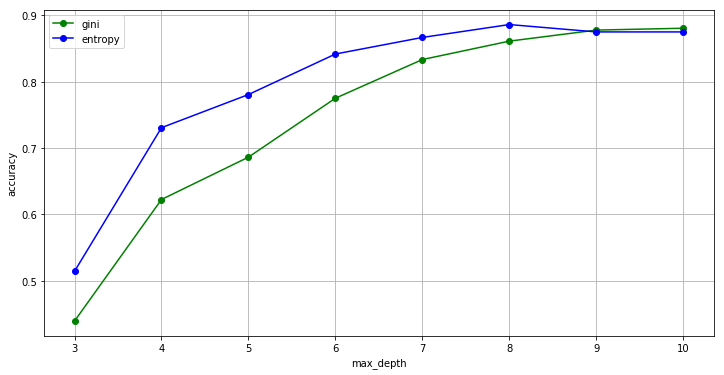

In [41]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(grid['max_depth'],  gini_acc, 'go-', label='gini')
plt.plot(grid['max_depth'],  entropy_acc, 'bo-', label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

In [42]:
gini_max = np.argmax(gini_acc)
entropy_max = np.argmax(entropy_acc)
opt_criterion = str()
opt_max_depth = int()
if np.max(gini_acc) > np.max(entropy_acc):
    print('gini', grid['max_depth'][gini_max])
    opt_criterion = 'gini'
    opt_max_depth = grid['max_depth'][gini_max]
else:
    print('entropy', grid['max_depth'][entropy_max])
    opt_criterion = 'entropy'
    opt_max_depth = grid['max_depth'][entropy_max]

entropy 8


Используя найденные оптимальные значения max_depth и criterion, обучите решающее дерево на X_train, y_train и вычислите вероятности принадлежности к классам для X_test.

In [43]:
model = DecisionTree(max_depth=opt_max_depth, criterion=opt_criterion)
model.fit(X_train, Y_train)
probs = model.predict_proba(X_test)

average = []
for column in range(X_test.shape[1]):
    average.append(probs[:, column].mean())

Для полученной матрицы вычислите усредненные по всем объектам из `X_test` значения вероятностей принадлежности к классам.

Чему примерно равна максимальная вероятность в полученном векторе?

In [44]:
print(np.max(average))

0.14712301587301588


### Регрессия (10% баллов)

С помощью метода `load_boston` загрузите датасет `boston`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие регрессионные деревья и убедитесь, что критерии `variance` и `mad_median` дают разные результаты.

In [45]:
boston = load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston['data'], boston['target'], test_size=0.2, random_state = 42)

In [46]:
from sklearn.metrics import mean_squared_error
model = DecisionTree(max_depth=5, criterion='variance')
model.fit(x_train, y_train)
prediction = model.predict(x_test)
mean_squared_error(y_test, prediction)

18.03882352941176

In [47]:
model = DecisionTree(max_depth=5, criterion='mad_median')
model.fit(x_train, y_train)
prediction = model.predict(x_test)
mean_squared_error(y_test, prediction)

22.219215686274506

С помощью 5-кратной кросс-валидации подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - `range(2, 9)`, а для `criterion` - {'variance', 'mad_median'}. Критерий качества `scoring`='neg_mean_squared_error'.

In [48]:
grid = {}
grid['max_depth'] = np.array([x for x in range(2, 9)])
grid['criterion'] = np.array(['variance', 'mad_median'])

In [49]:
gs = GridSearchCV(DecisionTree(), grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
gs.fit(boston['data'], boston['target'])
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] criterion=variance, max_depth=2 .................................
[CV] .................. criterion=variance, max_depth=2, total=   0.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] criterion=variance, max_depth=2 .................................
[CV] .................. criterion=variance, max_depth=2, total=   0.1s
[CV] criterion=variance, max_depth=2 .................................
[CV] .................. criterion=variance, max_depth=2, total=   0.2s
[CV] criterion=variance, max_depth=2 .................................
[CV] .................. criterion=variance, max_depth=2, total=   0.1s
[CV] criterion=variance, max_depth=2 .................................
[CV] .................. criterion=variance, max_depth=2, total=   0.1s
[CV] criterion=variance, max_depth=3 .................................
[CV] .................. criterion=variance, max_depth=3, total=   0.2s
[CV] criterion=variance, max_depth=3 .................................
[CV] .................. criterion=variance, max_depth=3, total=   0.2s
[CV] criterion=variance, max_depth=3 .................................
[CV] .................. criterion=variance, max_depth=3, total=   0.3s
[CV] c

[CV] ................ criterion=mad_median, max_depth=6, total=   1.0s
[CV] criterion=mad_median, max_depth=7 ...............................
[CV] ................ criterion=mad_median, max_depth=7, total=   1.3s
[CV] criterion=mad_median, max_depth=7 ...............................
[CV] ................ criterion=mad_median, max_depth=7, total=   1.4s
[CV] criterion=mad_median, max_depth=7 ...............................
[CV] ................ criterion=mad_median, max_depth=7, total=   1.5s
[CV] criterion=mad_median, max_depth=7 ...............................
[CV] ................ criterion=mad_median, max_depth=7, total=   1.4s
[CV] criterion=mad_median, max_depth=7 ...............................
[CV] ................ criterion=mad_median, max_depth=7, total=   1.2s
[CV] criterion=mad_median, max_depth=8 ...............................
[CV] ................ criterion=mad_median, max_depth=8, total=   1.8s
[CV] criterion=mad_median, max_depth=8 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   46.1s finished


({'criterion': 'mad_median', 'max_depth': 3}, -26.227154150197627)

Постройте графики средних значений критерия качества `neg_mean_squared_error` для критериев `variance` и `mad_median` в зависимости от `max_depth`.

In [50]:
from tqdm import tqdm
var_acc = []
mad_acc = []
for depth in tqdm(grid['max_depth']):
    model = DecisionTree(max_depth=depth, criterion='variance')
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    var_acc.append(mean_squared_error(y_test, prediction))
    
    model = DecisionTree(max_depth=depth, criterion='mad_median')
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    mad_acc.append(mean_squared_error(y_test, prediction))

100%|██████████| 7/7 [00:08<00:00,  1.15s/it]


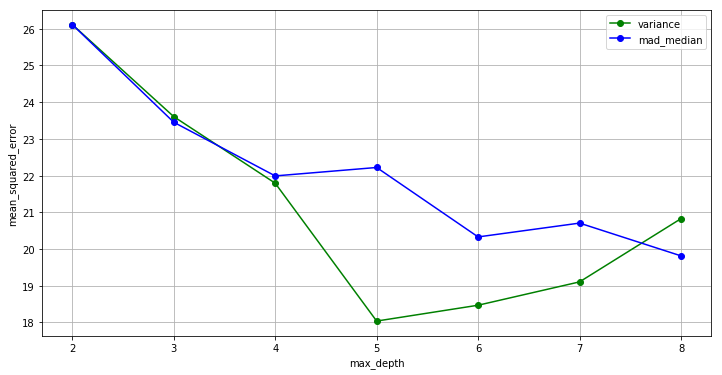

In [51]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(grid['max_depth'],  var_acc, 'go-', label='variance')
plt.plot(grid['max_depth'],  mad_acc, 'bo-', label='mad_median')
plt.xlabel('max_depth')
plt.ylabel('mean_squared_error')
plt.legend()
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

In [52]:
opt_max_depth = 5
opt_criterion = 'varience'